In [1]:
from astropy.io.votable import parse_single_table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
## Gaia DR2 -> BJD (http://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_datalink_tables/ssec_dm_light_curve.html)
## Gaia DR2 Time = BJD - 2455197.5 -> BJD (~JD) = Gaia Time + 2455197.5

## SDSS DR14 -> Time MJD
## SDSS DR14 MJD = JD - 2400000.5 -> JD = SDSS Time + 2400000.5

In [3]:
ctlg_dir = '../../../data/catalogues'
obs_dir = '../../../data/observations'

gaia_dir = f'{obs_dir}/photometry/gaia/xmatch/bands/G/'
xmatch_path =  f'{ctlg_dir}/gaia-sdss/cross-match-labels.csv'

In [4]:
xmatch = pd.read_csv(xmatch_path)
xmatch = xmatch.set_index('source_id_gaia')
xmatch = xmatch.reset_index()

In [5]:
times = []
cadence = []
for id_ in tqdm(xmatch.source_id_gaia.values):
    path = gaia_dir + str(id_) + '.dat'
    df = pd.read_csv(path)
    df_times = df.sort_values('time', axis=0, ascending=True).time.values
    times.append(df_times)
    cadence.append(df_times[1:] - df_times[:-1])

100%|██████████| 4607/4607 [00:14<00:00, 309.91it/s]


In [6]:
cadence_mean = np.array([c.mean() for c in cadence])
cadence_min = np.array([c.min() for c in cadence])
cadence_max = np.array([c.max() for c in cadence])

times_mean = np.array([t.mean() for t in times])
times_min = np.array([t.min() for t in times])
times_max = np.array([t.max() for t in times])

obs = [len(t) for t in times]

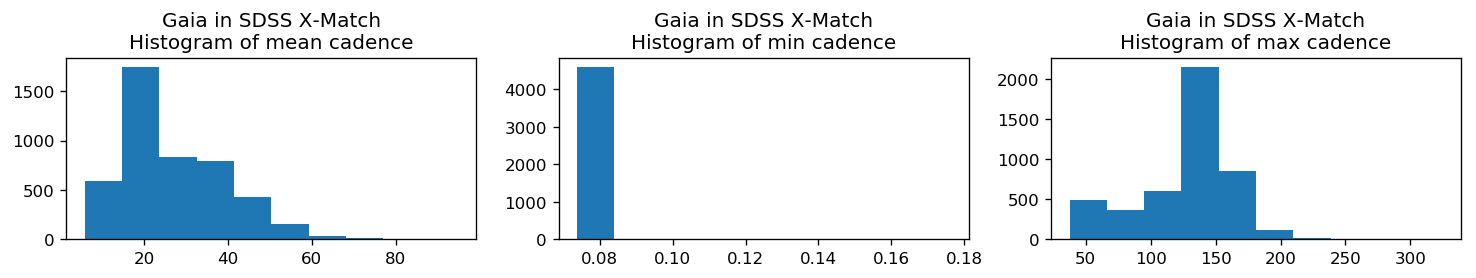

In [7]:
plt.figure(figsize=(15,2), dpi=120)

plt.subplot(1,3,1)
plt.title('Gaia in SDSS X-Match\nHistogram of mean cadence')
plt.hist(cadence_mean)

plt.subplot(1,3,2)
plt.title('Gaia in SDSS X-Match\nHistogram of min cadence')
plt.hist(cadence_min)

plt.subplot(1,3,3)
plt.title('Gaia in SDSS X-Match\nHistogram of max cadence')
plt.hist(cadence_max)

plt.show()

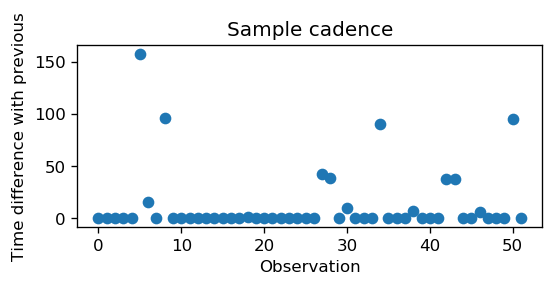

In [8]:
plt.figure(figsize=(5,2), dpi=120)
plt.title('Sample cadence')
plt.scatter(np.arange(len(cadence[0])), cadence[0])
plt.xlabel('Observation')
plt.ylabel('Time difference with previous')
plt.show()

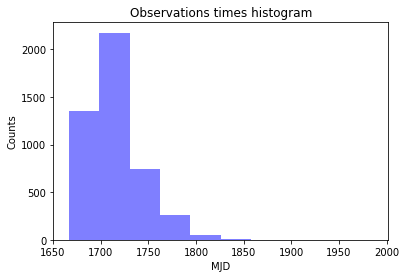

In [9]:
plt.hist(times_min, color='b', alpha=0.5, label='First ts observation')
# plt.hist(times_max, color='r', alpha=0.5, label='Last ts observation')
# plt.hist(xmatch.MJD_sdss, color='g', alpha=0.5, label='Spectra')
plt.xlabel('MJD')
plt.ylabel('Counts')
plt.title('Observations times histogram')
plt.show()

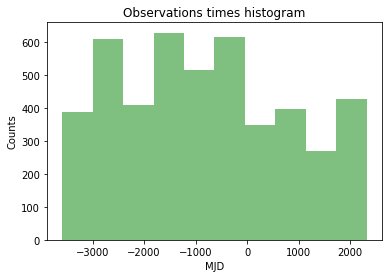

In [10]:
jd = xmatch.MJD_sdss + 2400000.5 - 2455197.5
plt.hist(jd, color='g', alpha=0.5, label='Spectra')
plt.xlabel('MJD') 
plt.ylabel('Counts')
plt.title('Observations times histogram')
plt.show()

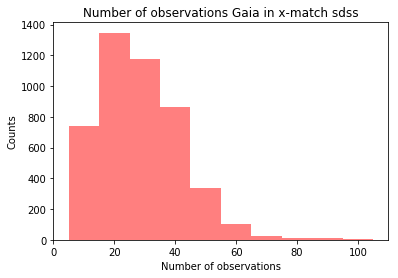

In [11]:
plt.hist(obs, color='r', alpha=0.5)
plt.xlabel('Number of observations') 
plt.ylabel('Counts')
plt.title('Number of observations Gaia in x-match sdss')
plt.show()

In [12]:
index = int(len(obs)*0.02)
sorted(obs)[index]

11